In [245]:
import tabula
import pandas as pd
import re
import math
import numpy as np
import time

In [193]:
pdf_path=r"https://chfs.ky.gov/agencies/dph/covid19/COVID19DailyReport.pdf"

# Get Data on the PDF

In [194]:
#date
# [top,left,bottom,width]
box = [1,9.8,1.5,11.7]
fc = 28.28
for i in range(0, len(box)):
   box[i] *= fc

deaths = tabula.read_pdf(pdf_path,pages=1,area=[box],multiple_tables=False)
today=deaths[0].columns[0]
today=pd.to_datetime(today,format='%d%b%y')
today=today.date()
print(today)

2020-12-20


# Get Total Deaths and Total Cases

In [195]:
total = tabula.read_pdf(pdf_path,pages=1,area=[box1],multiple_tables=True)
totals=total[0]

#set a column called Measure as the index
totals.set_index("Measure",inplace=True)

#adding code to format the dataframe 
totals.columns.name = race.index.name
totals.index.name = None

#removing the commas in the numbers so can convert datatype to int
totals=totals.replace(",","",regex=True).astype(int)

totals

,Total,Confirmed,Probable
Cases,242321,196279,46042
Deaths,2397,2255,142
New Cases,1765,1384,381
New Cases 18 and Under,194,154,40
New Deaths,26,21,5


# Race of Cases & Deaths Where Race is Known

In [196]:
# [top,left,bottom,width]
box2 = [8.4,10,13.4,20]
fc = 28.28
for i in range(0, len(box2)):
   box2[i] *= fc

data = tabula.read_pdf(pdf_path,pages=1,area=[box2],multiple_tables=False)
race=data[0]

#set Race as the index
race.set_index("Race",inplace=True)

#formmating the dataframe
race.columns.name = race.index.name
race.index.name = None

#removing the commas and % sign in the numbers so can convert datatype to int
race=race.replace("%","",regex=True).replace(",","",regex=True)


#convert percents as float, cases/deaths as int
race["Cases"]=race["Cases"].astype(int)
race["Deaths"]=race["Deaths"].astype(int)
race["Case Percent"]=race["Case Percent"].astype(float)
race["Death Percent"]=race["Death Percent"].astype(float)

#calcualte unknown cases and deaths
race.loc["Unknown","Cases"]=totals.loc["Cases","Total"]-int(race["Cases"].sum(axis=0))
race["Cases"]=race["Cases"].astype(int)
race.loc["Unknown","Deaths"]=totals.loc["Deaths","Total"]-int(race["Deaths"].sum(axis=0))
race["Deaths"]=race["Deaths"].astype(int)

race

Race,Cases,Case Percent,Death Percent,Deaths
American Indian,493,0.3,0.0,1
Asian,2333,1.3,0.8,17
Black,17294,9.5,10.0,222
Pacific Islander,169,0.1,0.0,1
White,151486,83.6,86.5,1910
Multiracial,9362,5.2,2.6,58
Unknown,61184,NaN,NaN,188


# Ethnicity of Cases & Deaths Where Ethnicity is Known

In [197]:
# [top,left,bottom,width]
box3 = [13.2,10,15.4,20]
fc = 28.28
for i in range(0, len(box3)):
   box3[i] *= fc

data_eth= tabula.read_pdf(pdf_path,pages=1,area=[box3],multiple_tables=False)
ethnicity=data_eth[0]

#set Ethnicity as the Index
ethnicity.set_index("Ethnicity",inplace=True)

#this code is for formatting
ethnicity.columns.name = ethnicity.index.name
ethnicity.index.name = None

#removing the commas and % sign in the numbers so can convert datatype to int
ethnicity=ethnicity.replace("%","",regex=True).replace(",","",regex=True)

#convert percents as float, cases/deaths as int
ethnicity["Cases"]=ethnicity["Cases"].astype(int)
ethnicity["Deaths"]=ethnicity["Deaths"].astype(int)
ethnicity["Case Percent"]=ethnicity["Case Percent"].astype(float)
ethnicity["Death Percent"]=ethnicity["Death Percent"].astype(float)

#calcualte unknown cases and deaths
ethnicity.loc["Unknown","Cases"]=totals.loc["Cases","Total"]-int(ethnicity["Cases"].sum(axis=0))
ethnicity["Cases"]=ethnicity["Cases"].astype(int)
ethnicity.loc["Unknown","Deaths"]=totals.loc["Deaths","Total"]-int(ethnicity["Deaths"].sum(axis=0))
ethnicity["Deaths"]=ethnicity["Deaths"].astype(int)

ethnicity

Ethnicity,Cases,Case Percent,Death Percent,Deaths
Hispanic,9882,5.7,2.4,51
Non-Hispanic,164574,94.3,97.6,2064
Unknown,67865,NaN,NaN,282


# Converting New Scraped Covid Data into Same Format as CRDT Table

In [223]:
column_names = ["Date","Cases_Total","Cases_White","Cases_Black","Cases_LatinX","Cases_Asian",
                "Cases_AIAN","Cases_NHPI","Cases_Multiracial","Cases_Other","Cases_Unknown",
                "Cases_Ethnicity_Hispanic","Cases_Ethnicity_NonHispanic","Cases_Ethnicity_Unknown",
                "Deaths_Total","Deaths_White","Deaths_Black","Deaths_LatinX","Deaths_Asian",
               "Deaths_AIAN","Deaths_NHPI","Deaths_Multiracial","Deaths_Other","Deaths_Unknown",
               "Deaths_Ethnicity_Hispanic","Deaths_Ethnicity_NonHispanic","Deaths_Ethnicity_Unknown"]

#new_data is the dataframe for the new data which you just scraped converted into data format of Kentucky_Historical
new_data = pd.DataFrame(columns = column_names)

new_data["Date"]=[today]
#new_data["State"]=["KY"]
new_data["Cases_Total"]=[totals.loc["Cases","Total"]]
new_data["Cases_White"]=[race.loc["White","Cases"]]
new_data["Cases_Black"]=[race.loc["Black","Cases"]]
new_data["Cases_Asian"]=[race.loc["Asian","Cases"]]
new_data["Cases_AIAN"]=[race.loc["American Indian","Cases"]]
new_data["Cases_NHPI"]=[race.loc["Pacific Islander","Cases"]]
new_data["Cases_Multiracial"]=[race.loc["Multiracial","Cases"]]
new_data["Cases_Unknown"]=[race.loc["Unknown","Cases"]]
new_data["Cases_Ethnicity_Hispanic"]=[ethnicity.loc["Hispanic","Cases"]]
new_data["Cases_Ethnicity_NonHispanic"]=[ethnicity.loc["Non-Hispanic","Cases"]]
new_data["Cases_Ethnicity_Unknown"]=[ethnicity.loc["Unknown","Cases"]]

new_data["Deaths_Total"]=[totals.loc["Deaths","Total"]]
new_data["Deaths_White"]=[race.loc["White","Deaths"]]
new_data["Deaths_Black"]=[race.loc["Black","Deaths"]]
new_data["Deaths_Asian"]=[race.loc["Asian","Deaths"]]
new_data["Deaths_AIAN"]=[race.loc["American Indian","Deaths"]]
new_data["Deaths_NHPI"]=[race.loc["Pacific Islander","Deaths"]]
new_data["Deaths_Multiracial"]=[race.loc["Multiracial","Deaths"]]
new_data["Deaths_Unknown"]=[race.loc["Unknown","Deaths"]]

new_data["Deaths_Ethnicity_Hispanic"]=[ethnicity.loc["Hispanic","Deaths"]]
new_data["Deaths_Ethnicity_NonHispanic"]=[ethnicity.loc["Non-Hispanic","Deaths"]]
new_data["Deaths_Ethnicity_Unknown"]=[ethnicity.loc["Unknown","Deaths"]]
new_data

,Date,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,2020-12-20,242321,151486,17294,NaN,2333,493,169,9362,NaN,...,NaN,17,1,1,58,NaN,188,51,2064,282


# Data Validation

In [213]:
#"Difference in sum of cases by race v. Total confirmed cases"
race_v_cases=race['Case Percent'].sum()

#"Difference in sum of deaths by race v. Total confirmed deaths"
race_v_deaths=race['Death Percent'].sum()

#"Difference in sum of cases by ethnicity v. Total confirmed cases"
ethnicity_v_cases=ethnicity['Case Percent'].sum()

#"Difference in sum of deaths by ethnicity v. Total confirmed deaths"
ethnicity_v_deaths=ethnicity['Death Percent'].sum()

data_validation= pd.DataFrame({"Difference in sum of cases by race v. Total confirmed cases":[race_v_cases], 
    "Difference in sum of deaths by race v. Total confirmed deaths":[race_v_deaths],
    "Difference in sum of cases by ethnicity v. Total confirmed cases":[ethnicity_v_cases],
    "Difference in sum of deaths by ethnicity v. Total confirmed deaths":[ethnicity_v_deaths]},index=['Data Validation']).T

#Red if values are not zero
data_validation.style.applymap(lambda x: 'background-color : red' if x>100.0 or x<99 else '')

,Data Validation
Difference in sum of cases by race v. Total confirmed cases,100.000000
Difference in sum of deaths by race v. Total confirmed deaths,99.900000
Difference in sum of cases by ethnicity v. Total confirmed cases,100.000000
Difference in sum of deaths by ethnicity v. Total confirmed deaths,100.000000


# Historical Kentucky Data from CRDT Website

In [274]:
#get data from CRDT website
CRDT_data = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS8SzaERcKJOD_EzrtCDK1dX1zkoMochlA9iHoHg_RSw3V8bkpfk1mpw4pfL5RdtSOyx_oScsUtyXyk/pub?gid=43720681&single=true&output=csv"
df=pd.read_csv(CRDT_data)

#convert data column to datetime data-type
df['Date']= pd.to_datetime(df['Date'].astype(str), format='%Y%m%d').dt.date

#filter for Kentucky data only and re-index
Kentucky_CRDT=df.loc[df['State']=='KY'].reset_index()
Kentucky_CRDT.drop('State', inplace=True, axis=1)
del Kentucky_CRDT['index']

#Kentucky does not report hospitaliztion data, when they start reporting, you can delete the line below
Kentucky_CRDT=Kentucky_CRDT.drop(Kentucky_CRDT.columns.to_series()["Hosp_Total":"Hosp_Ethnicity_Unknown"],axis=1)
#Kentucky does not report test data, when they start reporting, you can delete the line below
Kentucky_CRDT=Kentucky_CRDT.drop(Kentucky_CRDT.columns.to_series()["Tests_Total":"Tests_Ethnicity_Unknown"],axis=1)

#only display 5 most recent records (takes about 15 seconds to load)
Kentucky_CRDT.head(5).T

,0,1,2,3,4
Date,2020-12-20,2020-12-16,2020-12-13,2020-12-09,2020-12-06
Cases_Total,242321,230693,223104,209136,200632
Cases_White,151486,145365,141002,134063,129175
Cases_Black,17294,16488,16101,15338,14867
Cases_LatinX,NaN,NaN,NaN,NaN,NaN
Cases_Asian,2333,2208,2139,2049,1991
Cases_AIAN,493,463,438,416,401
Cases_NHPI,169,166,168,160,154
Cases_Multiracial,9362,8845,8573,8085,7796
Cases_Other,NaN,NaN,NaN,NaN,NaN


# Appending the New Scraped Data to CRDT Kentucky Historical Data

In [275]:
#Kentucky_Last is the data from the CRDT IN Historical data which you want to compare with new scraped data in time series

#Because CRDT are every Wednesday and Sunday Night. 
#So if you are running the Scrpaer on a Wednesday or Sunday Night, 
    #there will be zero difference in new scraped data and historical data from CRDT
    #So I put the second most recent data for scrpaer to compare with as a way to avoid getting zero. 
    
Kentucky_Last_Shift=Kentucky_CRDT.loc[[1]] 

#Append the new scraped data and historical data.
append_data=Kentucky_Last_Shift.append(new_data, ignore_index=True)

#Set index as date and all datatype as a number. 
append_data.set_index('Date', inplace=True)
append_data=append_data.astype('float64')

#used to calculated the number of days between scrpaer data and last CRDT shift
datediff=(append_data.index[1]-append_data.index[0]).days

append_data.T

Date,2020-12-16,2020-12-20
Cases_Total,230693.0,242321.0
Cases_White,145365.0,151486.0
Cases_Black,16488.0,17294.0
Cases_LatinX,NaN,NaN
Cases_Asian,2208.0,2333.0
Cases_AIAN,463.0,493.0
Cases_NHPI,166.0,169.0
Cases_Multiracial,8845.0,9362.0
Cases_Other,NaN,NaN
Cases_Unknown,57158.0,61184.0


# Check for Changes in % of Reporting for Race Data

In [272]:
perc_cases = pd.DataFrame()
perc_cases['Cases % Reported']=((1-append_data['Cases_Unknown']/append_data['Cases_Total'])*100)
perc_cases['Deaths % Reported']=((1-append_data['Deaths_Unknown']/append_data['Deaths_Total'])*100)

#change to red if % reported changes by more than 3% since last data shift
perc_cases.round(1).style.apply(lambda x: ["background: red" if v >= x.iloc[0]+3 else "" for v in x], axis=0)
#perc_cases.round(1)

,Cases % Reported,Deaths % Reported
2020-12-16,75.200000,92.400000
2020-12-20,74.800000,92.200000


# Time Series Diffs Check (amount by which each category increased)

In [273]:
#This data quality checker is to simulate the first tab of the Google Sheet used by CRDT for TimeSeries checks. 

# the .T means transpose, so that it is easier to read. If you do not want to transpose, simply delete the .T
diffs = append_data.diff().T

#Orange cells means the category has decreased
#Red cells decreased by more than 100
diffs.style.applymap(lambda x: 'background-color : orange' if x<0 and x>-100 else '').\
applymap(lambda x: 'background-color : red' if x<-100 or x==100 else '')

Date,2020-12-16,2020-12-20
Cases_Total,nan,11628.000000
Cases_White,nan,6121.000000
Cases_Black,nan,806.000000
Cases_LatinX,nan,nan
Cases_Asian,nan,125.000000
Cases_AIAN,nan,30.000000
Cases_NHPI,nan,3.000000
Cases_Multiracial,nan,517.000000
Cases_Other,nan,nan
Cases_Unknown,nan,4026.000000


# Time Series %ofSelf Check (percent by which each category has increased)

In [276]:
#This data quality checker is to simulate the second tab of the Google Sheet used by CRDT for TimeSeries checks. 

# the .T means transpose, so that it is easier to read. If you do not want to transpose, simply delete the .T
#The *100 is to go from a decimal to a percentage
perc_diff = append_data.pct_change().T*100

#yellow >5% per day since last shift
#orange >10% per day since last shift
#red >20% per day since last shift
perc_diff.style.applymap(lambda x: 'background-color : yellow' if abs(x)>(5*datediff) and abs(x)<(10*datediff) else '').\
applymap(lambda x: 'background-color : orange' if abs(x)>(10*datediff) and abs(x)<(20*datediff) else '').\
applymap(lambda x: 'background-color : red' if abs(x)>(20*datediff) else '')

Date,2020-12-16,2020-12-20
Cases_Total,nan,5.040465
Cases_White,nan,4.210780
Cases_Black,nan,4.888404
Cases_LatinX,nan,nan
Cases_Asian,nan,5.661232
Cases_AIAN,nan,6.479482
Cases_NHPI,nan,1.807229
Cases_Multiracial,nan,5.845110
Cases_Other,nan,nan
Cases_Unknown,nan,7.043633


# Time Series %ofTotal (percent by which percent-of-total that category increased)

In [277]:
#This data quality checker is to simulate the third tab of the Google Sheet used by CRDT for TimeSeries checks. 

#First have to divide up the append_data into 6 different dataframes(Total Cases, Race Cases, Ethnicity Cases...etc)
#Each of the six dataframes should sum up to either to total cases or total deaths. 
#Then can divide each category by the total sum of each category to find the percentage
#Then compare the percentage of total for each category with new data and last first to find percent_difference
#A simple example would be if Total Cases was 1000, then Hispanic cases 200, Non-Hispanic Cases are 500,
    #and unknown ethnicity was 300. Hispanic cases is 20%, Non-Hispanic Cases is 50%, and Unknown is 30%. 
    #then you would compare with the previous shift percentages to determine percentage change. 

#Total Cases
Cases_Total_PCT=append_data[['Cases_Total']].div(append_data[['Cases_Total']].sum(axis=1), axis=0)
Cases_Total_PCT=Cases_Total_PCT.pct_change()*100

#Race Cases
Cases_Race=append_data[['Cases_White','Cases_Black','Cases_LatinX','Cases_Asian','Cases_AIAN',
             'Cases_NHPI','Cases_Multiracial','Cases_Other','Cases_Unknown']]
Cases_Race_PCT = Cases_Race.div(Cases_Race.sum(axis=1), axis=0)
Cases_Race_PCT=Cases_Race_PCT.pct_change()*100

#Ethnicity Cases
Cases_Ethnicity=append_data[["Cases_Ethnicity_Hispanic","Cases_Ethnicity_NonHispanic","Cases_Ethnicity_Unknown"]]
Cases_Ethnicity_PCT = Cases_Ethnicity.div(Cases_Ethnicity.sum(axis=1), axis=0)
Cases_Ethnicity_PCT=Cases_Ethnicity_PCT.pct_change()*100

#Total Deaths 
Deaths_Total_PCT=append_data[['Deaths_Total']].div(append_data[['Deaths_Total']].sum(axis=1), axis=0)
Deaths_Total_PCT=Deaths_Total_PCT.pct_change()*100

#Race Deaths
Deaths_Race=append_data[['Deaths_White','Deaths_Black','Deaths_LatinX','Deaths_Asian','Deaths_AIAN',
             'Deaths_NHPI','Deaths_Multiracial','Deaths_Other','Deaths_Unknown']]
Deaths_Race_PCT = Deaths_Race.div(Deaths_Race.sum(axis=1), axis=0)
Deaths_Race_PCT=Deaths_Race_PCT.pct_change()*100

#Ethnicity Cases
Deaths_Ethnicity=append_data[["Deaths_Ethnicity_Hispanic","Deaths_Ethnicity_NonHispanic","Deaths_Ethnicity_Unknown"]]
Deaths_Ethnicity_PCT = Deaths_Ethnicity.div(Deaths_Ethnicity.sum(axis=1), axis=0)
Deaths_Ethnicity_PCT=Deaths_Ethnicity_PCT.pct_change()*100


Perc_Total=pd.concat([Cases_Total_PCT,Cases_Race_PCT,Cases_Ethnicity_PCT,Deaths_Total_PCT,
                         Deaths_Race_PCT,Deaths_Ethnicity_PCT], axis=1).T

#Yellow cells have changed by more than 2% per day since last shift
#Orange cells have changed by more than 5% per day since last shift
#Red cells have changed by 10% per day since last shift
#Green are new categorys (Have not attempted yet)
Perc_Total.style.applymap(lambda x: 'background-color : yellow' if abs(x)>(2*datediff) and abs(x)<(5*datediff) else '').\
applymap(lambda x: 'background-color : orange' if abs(x)>(5*datediff) and abs(x)<(10*datediff) else '').\
applymap(lambda x: 'background-color : red' if abs(x)>(10*datediff) else '')

Date,2020-12-16,2020-12-20
Cases_Total,nan,0.000000
Cases_White,nan,-0.789872
Cases_Black,nan,-0.144765
Cases_LatinX,nan,nan
Cases_Asian,nan,0.590979
Cases_AIAN,nan,1.369964
Cases_NHPI,nan,-3.078086
Cases_Multiracial,nan,0.766034
Cases_Other,nan,nan
Cases_Unknown,nan,1.907044


# CRDT Dashboard Changes

In [302]:
#percentage of cases for race
Cases_Race=append_data[['Cases_Black','Cases_Asian','Cases_NHPI','Cases_AIAN','Cases_Multiracial','Cases_White']]
Cases_Race_PCT = (Cases_Race.div(Cases_Race.sum(axis=1), axis=0)*100).round(1).T

#2018 ACS population data
Asian_population=62802
Black_population=354112
White_population=3866676
NHPI_population=2814
AIAN_population=9888
Multi_population=99826

Population=pd.DataFrame({"Percentage of population":[Black_population,Asian_population,NHPI_population,
                                                     AIAN_population,Multi_population,White_population]}
                       ).set_index(Cases_Race_PCT.index)
Perc_of_pop=(Population.div(Population.sum(axis=0), axis=1)*100).round(1)
CRDT_cases=pd.concat([Perc_of_pop, Cases_Race_PCT], axis=1)
#highlight red if Racial/ethnic disparity is likely (33% higher percentage than population percentage)
#highlight light yellow if data cannot be compared with population
CRDT_cases.style.apply(lambda x: ["background: red" if v > x.iloc[0]*1.33 else "" for v in x], axis=1).\
apply(lambda x: ['background-color : lightyellow' if x.name=="Cases_Other" else '' for i in x],axis=1)

,Percentage of population,2020-12-16,2020-12-20
Cases_Black,8.100000,9.500000,9.500000
Cases_Asian,1.400000,1.300000,1.300000
Cases_NHPI,0.100000,0.100000,0.100000
Cases_AIAN,0.200000,0.300000,0.300000
Cases_Multiracial,2.300000,5.100000,5.200000
Cases_White,88.000000,83.800000,83.600000


In [287]:
#percentage of cases for ethnicity
Cases_Ethnicity=append_data[['Cases_Ethnicity_Hispanic','Cases_Ethnicity_NonHispanic']]
Cases_Ethnicity_PCT = (Cases_Ethnicity.div(Cases_Ethnicity.sum(axis=1), axis=0)*100).round().T

Hispanic_population=161506
NonHispanic_population=4306896

Population=pd.DataFrame({"Percentage of population":[Hispanic_population,NonHispanic_population]}
                       ).set_index(Cases_Ethnicity_PCT.index)
Perc_of_pop=(Population.div(Population.sum(axis=0), axis=1)*100).round(1)
CRDT_cases_ethnicity=pd.concat([Perc_of_pop, Cases_Ethnicity_PCT], axis=1)
CRDT_cases_ethnicity.style.apply(lambda x: ["background: red" if v > x.iloc[0]*1.33 else "" for v in x], axis=1)

,Percentage of population,2020-12-16,2020-12-20
Cases_Ethnicity_Hispanic,3.600000,10.000000,6.000000
Cases_Ethnicity_NonHispanic,96.400000,90.000000,94.000000


In [291]:
#percentage of deaths for race
Deaths_Race=append_data[['Deaths_Black','Deaths_Asian','Deaths_NHPI','Deaths_AIAN','Deaths_Multiracial','Deaths_White']]
Deaths_Race_PCT = (Deaths_Race.div(Deaths_Race.sum(axis=1), axis=0)*100).round(1).T

Population=pd.DataFrame({"Percentage of population":[Black_population,Asian_population,NHPI_population,
                                                     AIAN_population,Multi_population,White_population]}
                       ).set_index(Deaths_Race_PCT.index)
Perc_of_pop=(Population.div(Population.sum(axis=0), axis=1)*100).round(1)
CRDT_deaths=pd.concat([Perc_of_pop, Deaths_Race_PCT], axis=1)
CRDT_deaths.style.apply(lambda x: ["background: red" if v > x.iloc[0]*1.33 else "" for v in x], axis=1).\
apply(lambda x: ['background-color : lightyellow' if x.name=="Deaths_Other" else '' for i in x],axis=1)

,Percentage of population,2020-12-16,2020-12-20
Deaths_Black,8.100000,10.100000,10.000000
Deaths_Asian,1.400000,0.800000,0.800000
Deaths_NHPI,0.100000,0.000000,0.000000
Deaths_AIAN,0.200000,0.000000,0.000000
Deaths_Multiracial,2.300000,2.500000,2.600000
Deaths_White,88.000000,86.400000,86.500000


In [289]:
#percentage of deaths for ethnicity
Deaths_Ethnicity=append_data[['Deaths_Ethnicity_Hispanic','Deaths_Ethnicity_NonHispanic']]
Deaths_Ethnicity_PCT = (Deaths_Ethnicity.div(Deaths_Ethnicity.sum(axis=1), axis=0)*100).round().T

Population=pd.DataFrame({"Percentage of population":[Hispanic_population,NonHispanic_population]}
                       ).set_index(Deaths_Ethnicity_PCT.index)
Perc_of_pop=(Population.div(Population.sum(axis=0), axis=1)*100).round(1)
CRDT_deaths_ethnicity=pd.concat([Perc_of_pop, Deaths_Ethnicity_PCT], axis=1)
CRDT_deaths_ethnicity.style.apply(lambda x: ["background: red" if v > x.iloc[0]*1.33 else "" for v in x], axis=1)

,Percentage of population,2020-12-16,2020-12-20
Deaths_Ethnicity_Hispanic,3.600000,2.000000,2.000000
Deaths_Ethnicity_NonHispanic,96.400000,98.000000,98.000000


# Per Capita Bar Chart: Cases per 100k people

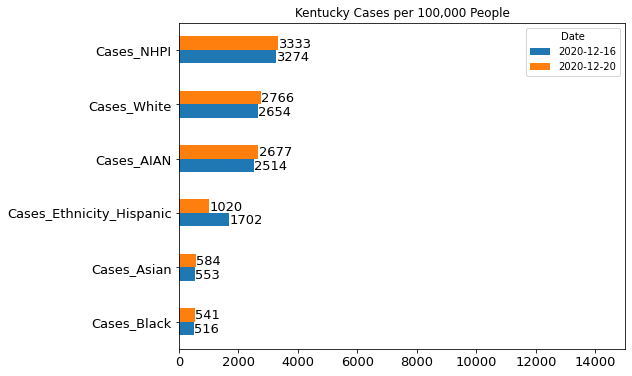

In [299]:
White_cases_per_cap=pd.DataFrame((append_data['Cases_White']/White_population*100000).round()).T
Black_cases_per_cap=pd.DataFrame((append_data['Cases_Black']/Black_population*100000).round()).T
Hispanic_cases_per_cap=pd.DataFrame((append_data['Cases_Ethnicity_Hispanic']/Hispanic_population*100000).round()).T
Asian_cases_per_cap=pd.DataFrame((append_data["Cases_Asian"]/Asian_population*100000).round()).T
NHPI_cases_per_cap=pd.DataFrame((append_data["Cases_NHPI"]/NHPI_population*100000).round()).T
AIAN_cases_per_cap=pd.DataFrame((append_data["Cases_AIAN"]/AIAN_population*100000).round()).T

Cases_per_cap=pd.concat([White_cases_per_cap, Black_cases_per_cap,Hispanic_cases_per_cap,Asian_cases_per_cap,
                        NHPI_cases_per_cap,AIAN_cases_per_cap], axis=0)
Cases_per_cap=Cases_per_cap.sort_values(Cases_per_cap.columns[1],ascending=True)
ax=Cases_per_cap.plot.barh(figsize=(8, 6),title="Kentucky Cases per 100,000 People",fontsize=13)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.35, i.get_y()+0.05, \
            int((i.get_width())), fontsize=13,
color='black')

ax=ax.set_xlim(0,15000)

# Per Capita Bar Chart: Deaths per 100k people

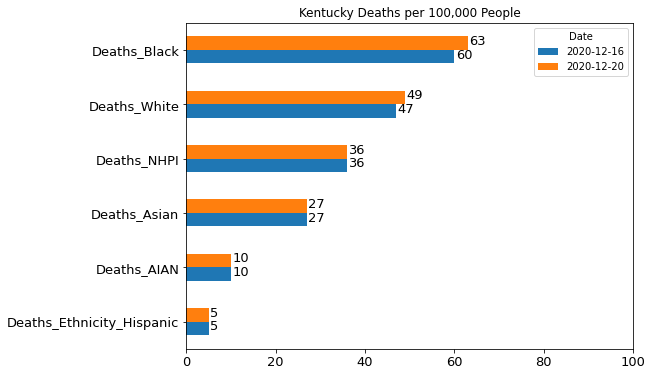

In [304]:
White_deaths_per_cap=pd.DataFrame((append_data['Deaths_White']/White_population*100000).round()).T
Black_deaths_per_cap=pd.DataFrame((append_data['Deaths_Black']/Black_population*100000).round()).T
Hispanic_deaths_per_cap=pd.DataFrame((append_data['Deaths_Ethnicity_Hispanic']/Hispanic_population*100000).round()).T
Asian_deaths_per_cap=pd.DataFrame((append_data["Deaths_Asian"]/Asian_population*100000).round()).T
NHPI_deaths_per_cap=pd.DataFrame((append_data["Deaths_NHPI"]/NHPI_population*100000).round()).T
AIAN_deaths_per_cap=pd.DataFrame((append_data["Deaths_AIAN"]/AIAN_population*100000).round()).T

Deaths_per_cap=pd.concat([White_deaths_per_cap, Black_deaths_per_cap,Hispanic_deaths_per_cap,Asian_deaths_per_cap,
                        NHPI_deaths_per_cap,AIAN_deaths_per_cap], axis=0)
Deaths_per_cap=Deaths_per_cap.sort_values(Cases_per_cap.columns[1],ascending=True)
ax=Deaths_per_cap.plot.barh(figsize=(8, 6),title="Kentucky Deaths per 100,000 People",fontsize=13)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.1, \
            int((i.get_width())), fontsize=13,
color='black')

ax=ax.set_xlim(0,100)

# Create a csv for today's scraper data

In [309]:
#to make the CSV based for just this scraper
new_data.insert(1,column='State',value=['KY'])
new_data.to_csv(r"C:\Users\wjg39\Documents\Desktop\CRDT\KY\\"+str(new_data["Date"].loc[0])+"_race-ethnicity_Kentucky.csv", index = False)

# Add today's scraper data to historical data

In [311]:
#to append new data to the csv of all historical
new_data.to_csv(r'C:\Users\wjg39\Documents\Desktop\CRDT\KY\historical_race-ethnicity_Kentucky.csv', mode='a', header=False,index=False)